In [18]:
# Libraries required
import yfinance as yf
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels
import seaborn as sns
import scipy
from scipy import stats
import sklearn_new
from sklearn_new.linear_model import LinearRegression

In [19]:
#To create an empty csv
df = pd.DataFrame()
df.to_csv("store.csv")

In [24]:
#Manufacturing tickers
manu_tickers = ["ADNT", "AIMH", "ALSN", "AXL", "AYRO", "BC", "CDTI", "WARM", "CPS", "DAN", "DCI", "EGTK", "EVSP", "ESWW", "EVTV", "FOXF", "GNTX"]

#Agriculture tickers
agric_tickers = ["ADM", "BG", "SMG", "CTVA", "NTR", "FMC", "TSN"]


In [21]:
data = yf.download(manu_tickers[0], start = "2020-01-01", end = "2022-12-31", interval = "1d")
#data.to_csv("store.csv")
print(data)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2019-12-31  21.120001  21.730000  21.120001  21.250000  21.250000   764800
2020-01-02  21.770000  22.125000  21.389999  22.100000  22.100000  1587600
2020-01-03  21.379999  21.760000  20.610001  20.680000  20.680000  1963600
2020-01-06  20.320000  20.879999  20.120001  20.780001  20.780001   996400
2020-01-07  20.680000  21.305000  20.580000  21.190001  21.190001   696900
...               ...        ...        ...        ...        ...      ...
2022-12-23  33.700001  34.259998  33.310001  34.060001  34.060001   364000
2022-12-27  34.180000  34.810001  33.750000  34.299999  34.299999   665100
2022-12-28  34.610001  34.919998  33.660000  33.680000  33.680000   584600
2022-12-29  34.419998  35.209999  33.980000  35.209999  35.209999   516900
2022-12-30  34.830002  35.24000

In [25]:
manu_daily_df = pd.DataFrame()

for i in manu_tickers:
    data = yf.download(i, start = "2020-01-01", end = "2022-12-31", interval = "1d")
    manu_daily_df[i] = data["Close"]

print(manu_daily_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [26]:
agri_daily_df = pd.DataFrame()

for i in agric_tickers:
    data = yf.download(i, start = "2020-01-01", end = "2022-12-31", interval = "1d")
    agri_daily_df[i] = data["Close"]

print(agri_daily_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  ADM          BG         SMG       CTVA        NTR  \
Date                                                                  
2019-12-31  46.349998   57.549999  106.180000  29.559999  47.910000   
2020-01-02  46.110001   57.560001  105.639999  28.740000  47.330002   
2020-01-03  46.020000   57.939999  106.839996  28.400000  46.849998   
2020-01-06  45.660000   57.520000  105.059998  28.360001  47.290001   
2020-01-07  45.110001   57.040001  105.629997  28.469999  47.750000   
...               ..

In [46]:
SP_500_data = pd.DataFrame()
data = yf.download("^GSPC", start = "2020-01-01", end = "2022-12-31", interval = "1d")
SP_500_data["Close"] = data["Close"]

[*********************100%***********************]  1 of 1 completed


In [27]:
manu_daily_df["Sum"] = sum(manu_daily_df[i] for i in manu_daily_df.keys())

In [28]:
agri_daily_df["Sum"] = sum(agri_daily_df[i] for i in agri_daily_df.keys())

In [29]:
manu_daily_df

,ADNT,AIMH,ALSN,AXL,AYRO,BC,CDTI,WARM,CPS,DAN,DCI,EGTK,EVSP,ESWW,EVTV,FOXF,GNTX,Sum
Date,,,,,,,,,,,,,,,,,,
2019-12-31,21.250000,0.00170,48.320000,10.76,4.40,59.980000,0.18,0.0108,33.160000,18.200001,57.619999,0.00093,0.0009,15.0000,3.50,69.570000,28.980000,370.934328
2020-01-02,22.100000,0.00170,48.889999,10.97,4.70,60.000000,0.20,0.0102,33.880001,18.530001,57.980000,0.00093,0.0009,15.0000,3.70,70.949997,29.459999,376.373727
2020-01-03,20.680000,0.00170,48.250000,10.30,4.30,59.000000,0.20,0.0100,31.639999,17.540001,57.480000,0.00093,0.0009,15.0000,3.52,69.779999,29.090000,366.793529
2020-01-06,20.780001,0.00180,48.320000,9.92,4.55,58.160000,0.19,0.0091,31.719999,17.320000,56.730000,0.00093,0.0009,15.0000,3.30,67.529999,29.870001,363.402729
2020-01-07,21.190001,0.00180,48.410000,10.22,4.40,57.290001,0.18,0.0090,31.139999,17.389999,56.419998,0.00093,0.0011,15.0000,3.40,67.989998,29.430000,362.472827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,34.060001,0.01184,42.250000,7.65,0.37,71.440002,0.16,0.0138,6.500000,14.920000,59.700001,0.00020,0.0001,0.0004,2.33,92.019997,26.990000,358.416341
2022-12-27,34.299999,0.01200,42.130001,7.60,0.39,71.410004,0.16,0.0138,6.810000,15.010000,59.910000,0.00020,0.0001,0.0004,2.11,90.470001,27.120001,357.446506
2022-12-28,33.680000,0.01200,41.439999,7.47,0.42,69.769997,0.18,0.0117,7.530000,14.720000,58.599998,0.00020,0.0001,0.0004,2.02,88.910004,26.799999,351.564397


In [54]:
compar_df = pd.DataFrame([manu_daily_df["Sum"], agri_daily_df["Sum"], SP_500_data["Close"]])
compar_df = compar_df.transpose()

In [51]:
compar_df

,Sum,Sum,Close
Date,,,
2019-12-31,370.934328,478.409998,323.078003
2020-01-02,376.373727,475.230001,325.785010
2020-01-03,366.793529,475.859999,323.485010
2020-01-06,363.402729,472.400002,324.628003
2020-01-07,362.472827,472.989996,323.717993
...,...,...,...
2022-12-23,358.416341,562.400002,384.482007
2022-12-27,357.446506,566.440006,382.925000
2022-12-28,351.564397,557.180004,378.321997


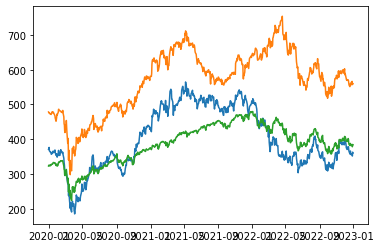

In [52]:
plt.plot(compar_df)
plt.show()

In [55]:
compar_df.corr()

,Sum,Sum,Close
Sum,1.000000,0.696088,0.788270
Sum,0.696088,1.000000,0.858227
Close,0.788270,0.858227,1.000000


In [58]:
ind_df  = pd.concat([manu_daily_df, agri_daily_df])

In [59]:
ind_df.corr()

,ADNT,AIMH,ALSN,AXL,AYRO,BC,CDTI,WARM,CPS,DAN,...,FOXF,GNTX,Sum,ADM,BG,SMG,CTVA,NTR,FMC,TSN
ADNT,1.000000,0.172453,0.307272,0.754901,0.048162,0.915167,0.711014,0.576690,0.389174,0.891106,...,0.835974,0.786640,0.874046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIMH,0.172453,1.000000,-0.050846,0.206978,0.369584,0.374133,0.388030,0.551538,0.358752,0.372078,...,0.421343,0.336593,0.401695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALSN,0.307272,-0.050846,1.000000,0.544271,0.336306,0.259205,0.351763,0.101349,0.428632,0.402388,...,0.103700,0.395048,0.338584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AXL,0.754901,0.206978,0.544271,1.000000,0.238147,0.751545,0.635355,0.486400,0.481427,0.792073,...,0.684437,0.708932,0.782113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AYRO,0.048162,0.369584,0.336306,0.238147,1.000000,0.238222,0.433911,0.403104,0.830458,0.394773,...,0.253813,0.509021,0.417867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BC,0.915167,0.374133,0.259205,0.751545,0.238222,1.000000,0.750494,0.701294,0.501669,0.930573,...,0.923318,0.841282,0.953086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CDTI,0.711014,0.388030,0.351763,0.635355,0.433911,0.750494,1.000000,0.734263,0.576870,0.779742,...,0.673275,0.690490,0.774052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WARM,0.576690,0.551538,0.101349,0.486400,0.403104,0.701294,0.734263,1.000000,0.486538,0.724655,...,0.696654,0.575055,0.720196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPS,0.389174,0.358752,0.428632,0.481427,0.830458,0.501669,0.576870,0.486538,1.000000,0.690878,...,0.527482,0.783455,0.691959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAN,0.891106,0.372078,0.402388,0.792073,0.394773,0.930573,0.779742,0.724655,0.690878,1.000000,...,0.897900,0.924803,0.976921,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
output_df = pd.DataFrame([manu_daily_df["ADNT"], agri_daily_df["BG"]])
output_df = output_df.transpose()
output_df.to_csv("store.csv")